In [61]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
#Lecture file
data = pd.read_csv('steam-200k.csv')

In [63]:
#Nettoyage time
cleanTime = data[ data['time_play'] == 1.0 ].index
data.drop(cleanTime, inplace=True)
data


,id,name_game,time_play,nothing
1,151603712,The Elder Scrolls V Skyrim,273.0,0
3,151603712,Fallout 4,87.0,0
5,151603712,Spore,14.9,0
7,151603712,Fallout New Vegas,12.1,0
9,151603712,Left 4 Dead 2,8.9,0
...,...,...,...,...
199991,128470551,Fallen Earth,2.4,0
199993,128470551,Magic Duels,2.2,0
199995,128470551,Titan Souls,1.5,0
199997,128470551,Grand Theft Auto Vice City,1.5,0


In [64]:
#Nettoie nothing
if 'nothing' in data:
    del data['nothing']
data

,id,name_game,time_play
1,151603712,The Elder Scrolls V Skyrim,273.0
3,151603712,Fallout 4,87.0
5,151603712,Spore,14.9
7,151603712,Fallout New Vegas,12.1
9,151603712,Left 4 Dead 2,8.9
...,...,...,...
199991,128470551,Fallen Earth,2.4
199993,128470551,Magic Duels,2.2
199995,128470551,Titan Souls,1.5
199997,128470551,Grand Theft Auto Vice City,1.5


In [65]:

#classement du top des plus jouer sur steam
data = data.sort_values(by='time_play',ascending=False)
#data = data.drop_duplicates(subset='name_game',keep="first")
data_reduce = data.head(40)




<AxesSubplot:title={'center':"Top 40 du plus grand nombre d'heure joué par un utilisateur sur un jeu en 2016"}, xlabel='name_game', ylabel='time_play'>

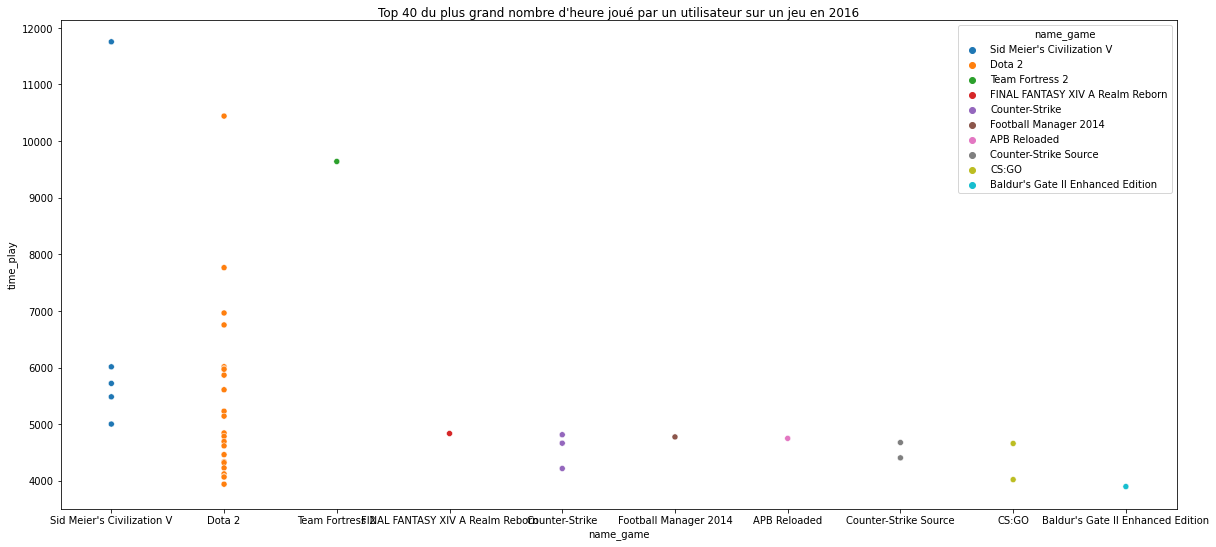

In [66]:
plt.figure(figsize=(20, 9))
plt.title("Top 40 du plus grand nombre d'heure joué par un utilisateur sur un jeu en 2016",pad=2)
# sns.scatterplot(data=data_reduce, x='name_game',y='time_play',hue='name_game')
sns.scatterplot(data=data_reduce, y='time_play',x='name_game',hue='name_game')

Ici nous n'avons pas les date de sortie, si nous comparons avec l'explosition du streaming
- certains jeux sont très streamer mais compliquer donc moins de joueurs
- jeux qui date de plusieurs années donc forcement plus encreer avec des joueur
- on y ajoute le statut de la marque qui les sorts
- si on regarde les stats de among us, fortnite, on constate que des jeux indé sont mis sous les projecteur grace au streamers
- voir au moment ou les jeux on exploser leurs nombre d'heure de jeux 
- On pourrais ce dire que c'est la popularité du jeux qui ramene les streamer

1. Fall Guys fait son apparition, avec presque 3,7 millions d'heures visionnées en plus cette semaine.  09 août 2020
- On va se baser sur 2020 car twitch a totalement exploser a ce moment:
Le secteur du streaming en direct aurait connu une hausse de 45% entre mars et avril, selon StreamElements et Arsenal.ggs
- Nuage de poid Dota 2

In [67]:

data[data['name_game']=='Counter-Strike']

,id,name_game,time_play
20716,32749624,Counter-Strike,4814.0
158186,22283916,Counter-Strike,4664.0
34836,121900241,Counter-Strike,4217.0
144907,41719717,Counter-Strike,3840.0
107520,66403743,Counter-Strike,3368.0
...,...,...,...
6243,218354629,Counter-Strike,0.1
20645,189858084,Counter-Strike,0.1
80736,25452454,Counter-Strike,0.1
54579,297690673,Counter-Strike,0.1


In [68]:
#Creation du fichier csv baser sur des data
# import os
# file = open("la.csv", "r")
# strD = file.read()
# file.close()
# strD = strD.replace(",",".")
# strD = strD.replace("\t","','")
# strD = strD.replace("\n","'\n'")
# strD = strD.replace("'",'"')
# strD = strD+ "\n"
# fileW = open("amongBisData.csv","w")
# #Check si il est vide
# if os.stat("amongBisData.csv").st_size == 0:
#     fileW.write(strD)
#     fileW.close()



In [69]:
#Cree le dataframe among
data_among = pd.read_csv('amongBisData.csv',error_bad_lines=False, engine="python")
#Petite conversion
data_among['Peak_Players'] =data_among['Peak_Players'].astype(float)
data_among['Avg_Players'] =data_among['Avg_Players'].astype(float)

#On met dans l'ordre croissant
data_filter_among = data_among.iloc[19::-1]
data_filter_among

/home/massmax/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 37: unexpected end of data


,Month,Avg_Players,Gain,p_Gain,Peak_Players
19,March 2020,233.4,+13.3,+6.04%,711.000
18,April 2020,321.1,+87.7,+37.58%,850.000
17,May 2020,488.9,+167.7,+52.23%,1.234
16,June 2020,616.4,+127.5,+26.08%,2.848
15,July 2020,2106.0,+1.489.6,+241.67%,6.771
14,August 2020,18719.8,+16.613.8,+788.86%,73.159
13,September 2020,151380.3,+132.660.5,+708.66%,438.524
12,October 2020,176453.9,+25.073.6,+16.56%,372.646
11,November 2020,114344.4,-62.109.5,-35.20%,336.108
10,December 2020,66538.5,-47.805.8,-41.81%,181.843


Text(0.5, 1.0, 'Moyenne des joueurs ayant joués à among us entre mars 2020 et octobre 2021')

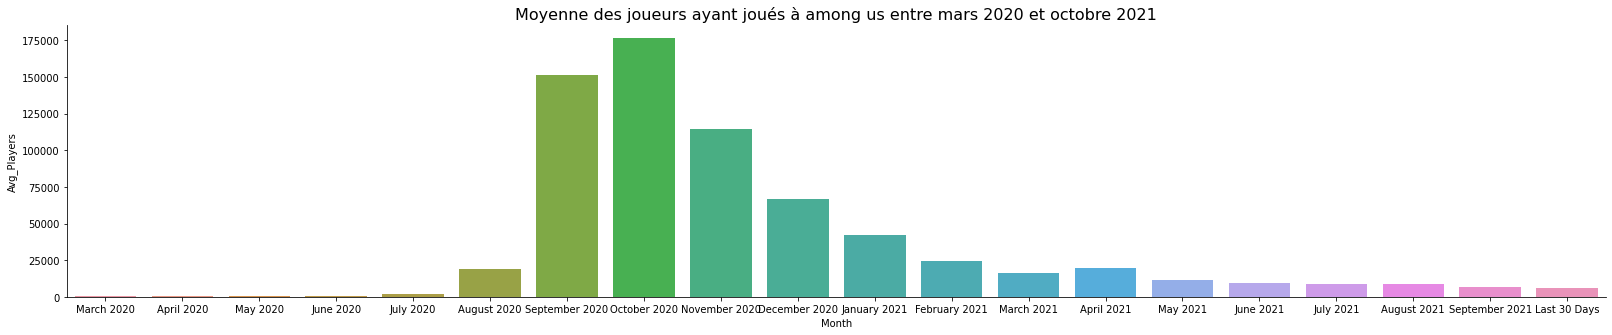

In [70]:
title = "Moyenne des joueurs ayant joués à among us entre mars 2020 et octobre 2021"
chart = sns.catplot(data=data_filter_among, height=4.5, y='Avg_Players', x='Month',kind='bar',aspect=5)
plt.title(title,size=16)

On constate clairement sur se graphe un pic entre septembre et novembre 2020 de moyenne de gens qui joue à among us. La on peut se demander si parallèle les statitiques de streams sur ce jeux a la même periode nous indique ou non une possible correlation

In [71]:
# file = open('amongTwitchViewer.csv','r')
# strD = file.read()
# file.close()
# strD = strD.replace("K", "_000")
# strD = strD.replace("M", "_000_000")
# strD = strD.replace("\t", '","')
# strD = strD.replace("\n","'\n'")
# strD = strD.replace("'",'"')
# fileW = open("TwitchDataAmong.csv","w")
# #Check si il est vide
# if os.stat("TwitchDataAmong.csv").st_size == 0:
#     fileW.write(strD)
#     fileW.close()

In [72]:
t_a_data = pd.read_csv('TwitchDataAmong.csv')
t_a_data['View'] = t_a_data['View'].astype(int)
#data_among['Peak_Players'] =data_among['Peak_Players'].astype(float)
t_a_data_filter = t_a_data.iloc[::-1]
#changement d'unité
t_a_data_filter['View'] = t_a_data_filter['View']/1_000_000
t_a_data_filter

,Month,View,Gain,p_Gain
19,03/2020,0.0738,+27_800,+60.6%
18,04/2020,0.1060,+32_100,+43.6%
17,05/2020,0.3220,+216_000,+204%
16,06/2020,0.1200,-202_000,-62.7%
15,07/2020,4.1600,+4.04_000_000,+3.4_000%
14,08/2020,30.6000,+26.4_000_000,+634%
13,09/2020,147.0000,+116_000_000,+380%
12,10/2020,110.0000,-37.2_000_000,-25.4%
11,11/2020,77.0000,-32.6_000_000,-29.7%
10,12/2020,50.3000,-26.7_000_000,-34.7%


Text(3.674999999999997, 0.5, 'Total vues en Milion')

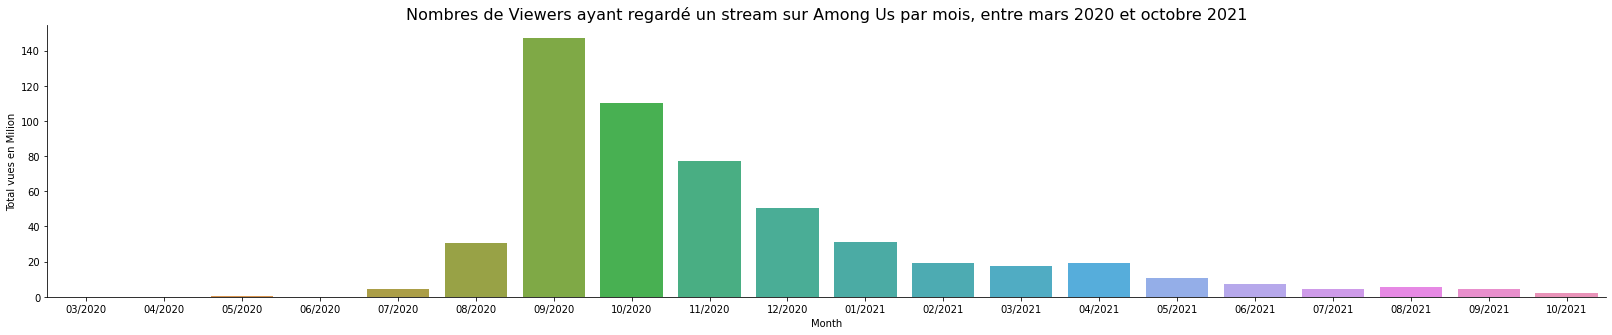

In [73]:
title = "Nombres de Viewers ayant regardé un stream sur Among Us par mois, entre mars 2020 et octobre 2021"
sns.catplot(data=t_a_data_filter, height=4.5, y='View', x='Month',kind='bar',aspect=5,)
plt.title(title,size=16)
plt.ylabel("Total vues en Milion",)

On constate ici clairement que le graphe est quasiment le meme

Text(0.5, 0.98, 'Influence du streaming sur Among Us')

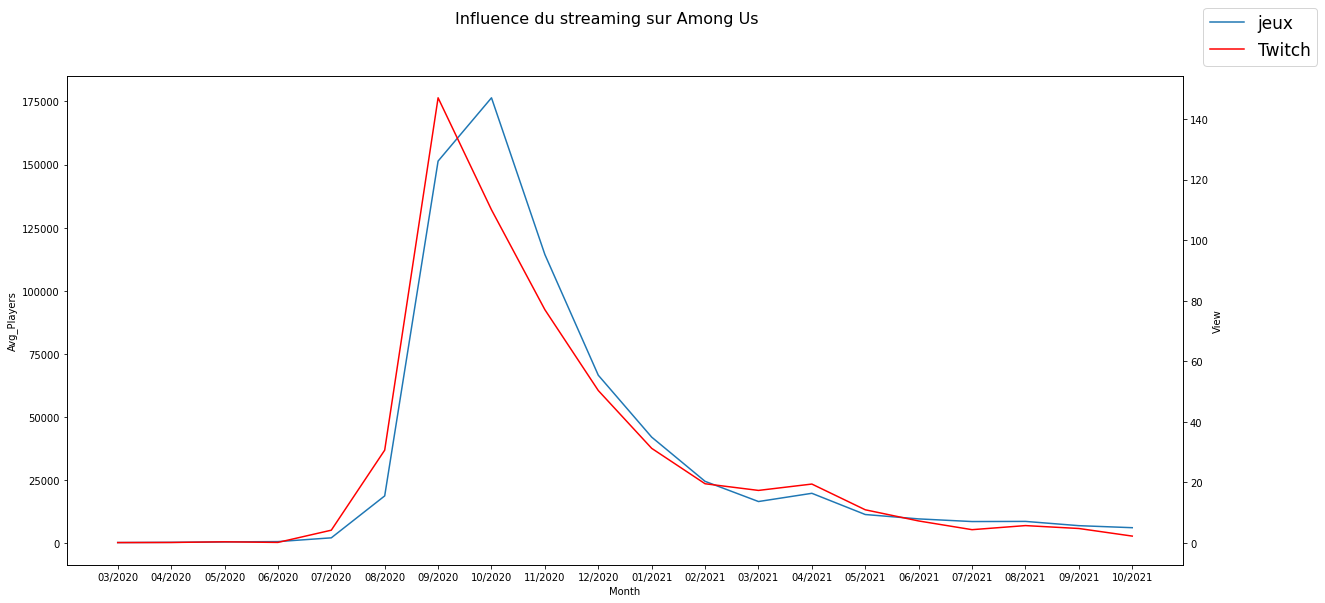

In [74]:

fig, ax = plt.subplots(figsize=(20, 9))
sns.lineplot(data=data_filter_among, y='Avg_Players', x='Month', ax=ax)
ax2 = ax.twinx()
sns.lineplot(data=t_a_data_filter, y='View', x='Month', ax=ax2, color='r')
fig.legend(["jeux","Twitch"],fontsize=17)
fig.suptitle("Influence du streaming sur Among Us",size=16)

